# This is the notebook for the python pandas dataframe course
### The idea of this notebook is to show the power of working with pandas dataframes

## Motivation

We usually work with tabular data

We should not handle them with bash commands like: for, split, grep, awk, etc...

And **pandas is a very nice tool** to handle this kind of data.

**Welcome to Pandas!**

## Definition of pandas:

Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. 

It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. 

Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language.

More information about pandas: <http://pandas.pydata.org/pandas-docs/stable/>

## Contents of the course:

- Know your data
  - Dimensionality: Series or DataFrame
  - Index
  - Some examples
  - Exercise: Selecting pandas structure
         
- I/O:
   - Reading: CSV, FITS, SQL
   - Writing: CSV
   - Advanced example: Reading and writing CSV files by chunks
   
- Selecting and slicing:
    - *loc.* & *iloc.*
    - Advanced example: Estimate a galaxy property for a subset of galaxies using boolean conditions
    - Exercise: Estimate another galaxy property

- Merge, join, and concatenate
    - Exercise: Generate a random catalog using the *concat* method
    - Exercise: Merging dataframes using the *merge* method

- More functions:
    - Loop a dataframe (itertuples and iterows)
    - Sort
    - Sample
    - Reshape: pivot, stack, unstack, etc.
    
- Summary

- Caveats and technicalities:
    - Floating point limitations
    - .values
    - FITS chunks
    - View or copy
    - Wrong input example

### Some useful information

- Ten minutes to pandas:

<https://pandas.pydata.org/pandas-docs/stable/10min.html>

- Pandas cookbook:

<https://pandas.pydata.org/pandas-docs/stable/cookbook.html>

- Nice pandas course:

<https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python#gs.=B6Dr74>

- Multidimensional dataframes, xarray: 

<http://xarray.pydata.org/en/stable/>

- Tips & Tricks

<https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/>

## Know your data

Very important to (perfectly) know your data: structure, data type, index, relation, etc. (see Pau's talk for a much better explanation ;)

### Dimensionality:
    - 1-D: Series; e.g.
        - Solar planets: [Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune]
        - Set of astronomical objects and when they were observed:
            [[NGC1952, 2012-05-01],
             [NGC224, 2013-01-23],
             [NGC5194, 2014-02-13]]
    - 2-D: DataFrame; e.g (more business oriented):
        - 3 months of sales information for 3 fictitious companies:
            sales = [{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
                     {'account': 'Alpha Co',  'Jan': 200, 'Feb': 210, 'Mar': 215},
                     {'account': 'Blue Inc',  'Jan': 50,  'Feb': 90,  'Mar': 95 }]

### Index
- It is the value (~key) we use as a reference for each element. (Note: It does not have to be unique)

- Most of the data contain at least one index

In [1]:
# Import libraries
import pandas as pd
import numpy as np

### Series definition
Series is a one-dimensional labeled array capable of holding any data type

The axis labels are collectively referred to as the index

This is the basic idea of how to create a Series dataframe:

**s = pd.Series(data, index=index)**

where data can be:
- list
- ndarray
- python dictionary
- scalar
and index is a list of axis labels

#### Create a Series array from a list
If no index is passed, one will be created having values [0, ..., len(data) - 1]

In [2]:
solar_planets = ['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']

In [3]:
splanets = pd.Series(solar_planets)

In [4]:
# Tips and tricks
# To access the Docstring for quick reference on syntax use ? before:
?pd.Series()

In [5]:
splanets

0    Mercury
1      Venus
2      Earth
3       Mars
4    Jupiter
5     Saturn
6     Uranus
7    Neptune
dtype: object

In [6]:
splanets.index

RangeIndex(start=0, stop=8, step=1)

#### Create a Series array from a numpy array
If data is an ndarray, index must be the same length as data. 
If no index is passed, one will be created having values [0, ..., len(data) - 1]

- Not including index:

In [7]:
s1 = pd.Series(np.random.randn(5))

In [8]:
s1

0    0.839192
1   -0.177725
2   -0.650525
3    1.943050
4   -0.407948
dtype: float64

In [9]:
s1.index

RangeIndex(start=0, stop=5, step=1)

- Including index

In [10]:
s2 = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])

In [11]:
s2

a   -1.430931
b    0.599310
c    0.449580
d   -0.927377
e    0.279493
dtype: float64

In [12]:
s2.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

- From scalar value

If data is a scalar value, an index must be provided

The value will be repeated to match the length of index

In [13]:
s3 = pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

In [14]:
s3

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [15]:
s3.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

#### Create a Series array from a python dictionary

In [16]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}

In [17]:
sd = pd.Series(d)

In [18]:
sd

a    0.0
b    1.0
c    2.0
dtype: float64

### DataFrame definition

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types (see also [Panel](<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html>) - 3-dimensional array).

You can think of it **like a spreadsheet or SQL table, or a dict of Series objects**. 

It is generally the most commonly used pandas object. 

Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

#### From a list of dictionaries

In [19]:
sales = [{'account': 'Jones LLC', 'Jan': 150, 'Feb': 200, 'Mar': 140},
                 {'account': 'Alpha Co',  'Jan': 200, 'Feb': 210, 'Mar': 215},
                 {'account': 'Blue Inc',  'Jan': 50,  'Feb': 90,  'Mar': 95 }]

In [20]:
df = pd.DataFrame(sales)

In [21]:
df

,Feb,Jan,Mar,account
0,200,150,140,Jones LLC
1,210,200,215,Alpha Co
2,90,50,95,Blue Inc


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
Feb        3 non-null int64
Jan        3 non-null int64
Mar        3 non-null int64
account    3 non-null object
dtypes: int64(3), object(1)
memory usage: 176.0+ bytes


In [23]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [24]:
df = df.set_index('account')

In [25]:
df

,Feb,Jan,Mar
account,,,
Jones LLC,200,150,140
Alpha Co,210,200,215
Blue Inc,90,50,95


#### From dict of Series or dicts

In [26]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [27]:
df = pd.DataFrame(d)

In [28]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
one    3 non-null float64
two    4 non-null float64
dtypes: float64(2)
memory usage: 96.0+ bytes


In [30]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [31]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [32]:
df.columns

Index(['one', 'two'], dtype='object')

#### From dict of ndarrays / lists
The ndarrays must all be the same length. 

If an index is passed, it must clearly also be the same length as the arrays. 

If no index is passed, the result will be range(n), where n is the array length.

In [33]:
d = {'one' : [1., 2., 3., 4.], 'two' : [4., 3., 2., 1.]}

In [34]:
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [35]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


#### From structured or record array
The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. 

If no index is passed, the result will be range(n), where n is the array length.

In [36]:
data = np.random.random_sample((5, 5))

In [37]:
data

array([[  7.23859488e-01,   3.31883930e-01,   1.08485265e-01,
          4.52108368e-01,   6.86579094e-01],
       [  8.95936464e-01,   4.82502529e-01,   5.59731159e-01,
          1.42566529e-01,   3.47673186e-01],
       [  6.53948992e-01,   7.72768330e-04,   3.34231728e-01,
          4.33355882e-01,   8.93420659e-01],
       [  2.68504828e-02,   7.42511229e-01,   1.65019814e-01,
          5.25836962e-01,   5.68367740e-01],
       [  6.69057618e-01,   4.61794232e-01,   9.04197727e-01,
          3.21779197e-01,   5.16591225e-01]])

In [38]:
df = pd.DataFrame(data)

In [39]:
df

,0,1,2,3,4
0,0.723859,0.331884,0.108485,0.452108,0.686579
1,0.895936,0.482503,0.559731,0.142567,0.347673
2,0.653949,0.000773,0.334232,0.433356,0.893421
3,0.026850,0.742511,0.165020,0.525837,0.568368
4,0.669058,0.461794,0.904198,0.321779,0.516591


In [40]:
# Add index
df = pd.DataFrame(data,index = ['a','b','c','d','e'])

In [41]:
df

,0,1,2,3,4
a,0.723859,0.331884,0.108485,0.452108,0.686579
b,0.895936,0.482503,0.559731,0.142567,0.347673
c,0.653949,0.000773,0.334232,0.433356,0.893421
d,0.026850,0.742511,0.165020,0.525837,0.568368
e,0.669058,0.461794,0.904198,0.321779,0.516591


In [42]:
# Add column names
df = pd.DataFrame(data, index = ['a','b','c','d','e'], columns = ['ra', 'dec','z_phot','z_true','imag'])

In [43]:
df

,ra,dec,z_phot,z_true,imag
a,0.723859,0.331884,0.108485,0.452108,0.686579
b,0.895936,0.482503,0.559731,0.142567,0.347673
c,0.653949,0.000773,0.334232,0.433356,0.893421
d,0.026850,0.742511,0.165020,0.525837,0.568368
e,0.669058,0.461794,0.904198,0.321779,0.516591


#### From a list of dicts

In [44]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [45]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [46]:
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [47]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


### Exercise:
Given a few galaxies with some properties ['id', 'ra', 'dec', 'magi'], choose which pandas structure to use and its index:

In [48]:
#Few galaxies with some properties: id, ra, dec, magi
galaxies = [
    {'id' : 1, 'ra' : 4.5, 'dec' : -55.6, 'magi' : 21.3},
    {'id' : 3, 'ra' : 23.5, 'dec' : 23.6, 'magi' : 23.3},
    {'id' : 25, 'ra' : 22.5, 'dec' : -0.3, 'magi' : 20.8},
    {'id' : 17, 'ra' : 33.5, 'dec' : 15.6, 'magi' : 24.3}   
]

In [49]:
df_galaxies = pd.DataFrame.from_records(galaxies, index = 'id')
df_galaxies

,dec,magi,ra
id,,,
1,-55.6,21.3,4.5
3,23.6,23.3,23.5
25,-0.3,20.8,22.5
17,15.6,24.3,33.5


In [50]:
df_galaxies = pd.DataFrame(galaxies)

In [51]:
df_galaxies

,dec,id,magi,ra
0,-55.6,1,21.3,4.5
1,23.6,3,23.3,23.5
2,-0.3,25,20.8,22.5
3,15.6,17,24.3,33.5


In [52]:
df_galaxies = df_galaxies.set_index('id')

In [53]:
df_galaxies

,dec,magi,ra
id,,,
1,-55.6,21.3,4.5
3,23.6,23.3,23.5
25,-0.3,20.8,22.5
17,15.6,24.3,33.5


### Reading from different sources into a DataFrame
- Most of the times any study starts with an **input file** containing some data rather than having a python list or dictionary.

- Here we present three different data sources and how to read them: two file formats (**CSV** and **FITS**) and a **database** connection.

- **Advanced**: More and more frequently the amount of data to handle is larger and larger (Big Data era) and therefore files are huge. This is why we strongly recommend to always program by chunks (sometimes it is mandatory and also it is not straight forward to implement).

#### FORGET ABOUT FOTRAN!
#### FORGET ABOUT FPRINTF AND FSCANF!

; )

#### - From a CSV (Comma Separated Value) file:

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html>

#### Reading the full catalog at once (if the file is not very large)

- CSV file created using the following query (1341.csv.bz2):

```
SELECT unique_gal_id, ra_gal, dec_gal, z_cgal, z_cgal_v, lmhalo, (mr_gal - 0.8 * (atan(1.5 * z_cgal)- 0.1489)) AS abs_mag, gr_gal AS color, (des_asahi_full_i_true - 0.8 * (atan(1.5 * z_cgal)- 0.1489)) AS app_mag FROM micecatv2_0_view TABLESAMPLE (BUCKET 1 OUT OF 512)
```

In [54]:
filename = '../resources/galaxy_sample.csv'

- CSV.BZ2 (less storage, slower when reading because of decompression)

In [55]:
filename_bz2 = '../resources/galaxy_sample.csv.bz2'

#### Reading the full catalog at once (if the file is not very large)

In [56]:
# Field index name (known a priori from the header or the file description)
unique_gal_id_field = 'unique_gal_id'

In [57]:
galaxy_sample = pd.read_csv(filename, sep=',', index_col = unique_gal_id_field, comment='#', na_values = '\\N')

In [58]:
galaxy_sample.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
28066816,2.814453,31.387212,0.28162,0.28243,11.8192,-19.978033,0.6869,19.654366
31695360,11.170244,52.128139,0.52944,0.53018,12.1493,-20.899816,0.9445,20.573183
9050624,15.515433,73.343966,0.32986,0.32613,12.1488,-18.419456,0.3122,21.690542
2320896,44.974395,19.339001,0.11159,0.11212,11.8812,-15.157958,0.4212,22.382442


In [59]:
galaxy_sample.tail()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
87805440,30.801181,50.422853,0.55537,0.55709,13.4698,-17.979239,0.7846,23.409461
84195840,37.404032,13.298397,0.32954,0.32949,13.4822,-15.640249,0.2666,24.475853
67681792,84.950583,62.382859,0.35486,0.35410,11.5632,-19.574097,0.5082,20.715805
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826


- DataFrame.describe:

Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [60]:
galaxy_sample.describe()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
count,975842.000000,975842.000000,975842.000000,975842.000000,975842.000000,975842.000000,975842.000000,975842.000000
mean,44.998441,33.591252,0.713735,0.713762,11.754832,-18.735802,0.584029,23.085264
std,25.665964,21.613155,0.344801,0.344838,0.848876,1.884709,0.227648,1.161143
min,-269.999954,-0.000512,0.072960,0.066510,10.077000,-23.521898,-0.196400,14.130944
25%,23.075562,15.312631,0.428260,0.428200,11.158200,-20.147899,0.403000,22.508331
50%,45.030361,31.258262,0.700600,0.700560,11.562100,-19.059314,0.548300,23.374423
75%,66.884490,49.729659,0.979520,0.979630,12.204000,-17.610126,0.788800,23.929436
max,90.000000,89.834812,1.417080,1.423190,15.268300,-12.972296,1.346700,24.962731


In [61]:
galaxy_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975842 entries, 28581888 to 63993856
Data columns (total 8 columns):
ra_gal      975842 non-null float64
dec_gal     975842 non-null float64
z_cgal      975842 non-null float64
z_cgal_v    975842 non-null float64
lmhalo      975842 non-null float64
abs_mag     975842 non-null float64
color       975842 non-null float64
app_mag     975842 non-null float64
dtypes: float64(8)
memory usage: 67.0 MB


In [62]:
galaxy_sample_bz2 = pd.read_csv(filename_bz2, sep=',', index_col = unique_gal_id_field, comment='#', na_values = r'\N')

In [63]:
galaxy_sample_bz2.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
28066816,2.814453,31.387212,0.28162,0.28243,11.8192,-19.978033,0.6869,19.654366
31695360,11.170244,52.128139,0.52944,0.53018,12.1493,-20.899816,0.9445,20.573183
9050624,15.515433,73.343966,0.32986,0.32613,12.1488,-18.419456,0.3122,21.690542
2320896,44.974395,19.339001,0.11159,0.11212,11.8812,-15.157958,0.4212,22.382442


#### [FITS file](https://fits.gsfc.nasa.gov/):

- Pandas does not read directly FITS files so it is necessary to make some "convertion"

- We have found 2 different approaches:
 - [Table](http://docs.astropy.org/en/stable/io/fits/usage/table.html) method from astropy [pyfits](https://pythonhosted.org/pyfits/)
 - fitsio (see "Caveats and technicalities" section below)

- Not easy to read it by chunks (see also "Caveats and technicalities" section below)

- Note: we strongly recommend to use CSV.BZ2!

#### Using astropy (or pyfits)

- This method does not support "by chunks" and therefore you have to read it all at once

In [64]:
from astropy.table import Table

FITS file created using the same query as the CSV file:

In [65]:
filename = '../resources/galaxy_sample.fits'

In [66]:
#?Table.read()

In [67]:
data = Table.read(filename)

In [68]:
type(data)

astropy.table.table.Table

In [69]:
df = data.to_pandas()

In [70]:
df.head()

,unique_gal_id,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
0,28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
1,28066816,2.814453,31.387212,0.28162,0.28243,11.8192,-19.978033,0.6869,19.654366
2,31695360,11.170244,52.128139,0.52944,0.53018,12.1493,-20.899816,0.9445,20.573183
3,9050624,15.515433,73.343966,0.32986,0.32613,12.1488,-18.419456,0.3122,21.690542
4,2320896,44.974395,19.339001,0.11159,0.11212,11.8812,-15.157958,0.4212,22.382442


In [71]:
df = df.set_index('unique_gal_id')

In [72]:
df.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
28066816,2.814453,31.387212,0.28162,0.28243,11.8192,-19.978033,0.6869,19.654366
31695360,11.170244,52.128139,0.52944,0.53018,12.1493,-20.899816,0.9445,20.573183
9050624,15.515433,73.343966,0.32986,0.32613,12.1488,-18.419456,0.3122,21.690542
2320896,44.974395,19.339001,0.11159,0.11212,11.8812,-15.157958,0.4212,22.382442


In [73]:
df.shape

(975842, 8)

In [74]:
df.values.dtype

dtype('float64')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975842 entries, 28581888 to 63993856
Data columns (total 8 columns):
ra_gal      975842 non-null float64
dec_gal     975842 non-null float64
z_cgal      975842 non-null float64
z_cgal_v    975842 non-null float64
lmhalo      975842 non-null float32
abs_mag     975842 non-null float64
color       975842 non-null float32
app_mag     975842 non-null float64
dtypes: float32(2), float64(6)
memory usage: 59.6 MB


#### - From Database:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html

In [76]:
# For PostgreSQL access
from sqlalchemy.engine import create_engine
# Text wrapping
import textwrap

In [77]:
# Database configuration parameters
#db_url = '{scheme}://{user}:{password}@{host}/{database}'
db_url = 'sqlite:////nfs/astro/jcarrete/sandbox/curso_python/pandas.sqlite'

sql_sample = textwrap.dedent("""\
SELECT *
FROM micecatv1
WHERE ABS(ra_mag-ra) > 0.05
""")

index_col = 'id'

In [78]:
# Create database connection
engine = create_engine(db_url)
df = pd.read_sql(sql_sample, engine,index_col = 'id')

In [79]:
df.head()

,ra,dec,ra_mag,dec_mag
id,,,,
12127906,29.710205,81.697731,29.830847,81.685196
12127907,29.94643,81.650085,30.069408,81.637154
12127908,28.911779,81.660011,29.037128,81.647942
12127909,29.008251,81.665115,29.130402,81.65284
12127910,28.810217,81.616325,28.933874,81.604515


#### Write to csv file:

In [80]:
outfile = '/nfs/astro/jcarrete/sandbox/curso_python/micecatv1_sample1.csv'

In [81]:
with open(outfile, 'w') as f_out:
    df.to_csv(f_out,
              columns = ['ra', 'dec','ra_mag','dec_mag'],
              index=True,
              header=True
             )

#### Advanced example: Reading and writing by chunks

In [82]:
filename = '../resources/galaxy_sample.csv'
outfile = '../resources/galaxy_sample_some_columns.csv'

In [83]:
# chunk size
gal_chunk = 300000

In [84]:
# Field index name (known a priori from the header or the file description)
unique_gal_id_field = 'unique_gal_id'

- Opening file with the *with* method

- Creating a file object using [read_csv](<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html>) method

- Looping by chunks using enumerate in order to also have the chunk number

In [85]:
with open(filename, 'r') as galaxy_fd, open (outfile, 'w') as f_out:
    galaxy_sample_reader = pd.read_csv(
        galaxy_fd, 
        sep=',', 
        index_col = unique_gal_id_field, 
        comment='#', 
        na_values = '\\N', 
        chunksize=gal_chunk
    )
    for chunk, block in enumerate(galaxy_sample_reader):
        print(chunk)
        # In order not to write n chunk times the header (HELP PAU!)
        block.to_csv(f_out, 
            columns = ['ra_gal','dec_gal','z_cgal_v'], 
            index=True, 
            header= chunk==0, 
            mode='a'
       )

0
1
2
3


In [86]:
block.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
264070144,81.169420,20.019540,0.92158,0.92077,11.4712,-19.689712,0.9204,23.537487
215032832,58.800662,7.457184,0.62922,0.62909,11.7844,-19.398388,0.7527,22.336912
223196672,56.878832,49.248783,1.18275,1.18429,11.4106,-19.600601,0.5401,24.005098
240320000,87.511658,55.628829,1.31740,1.31850,11.4322,-19.701838,0.5181,23.912261
257913344,46.117504,32.160875,1.13509,1.13433,12.2920,-21.364079,1.0197,22.360321


In [87]:
block.tail(3)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
67681792,84.950583,62.382859,0.35486,0.35410,11.5632,-19.574097,0.5082,20.715805
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619
63993856,68.025492,34.740194,0.20558,0.20466,13.8767,-14.264275,0.3934,24.659826


- DataFrame *plot* method (just for curiosity!)

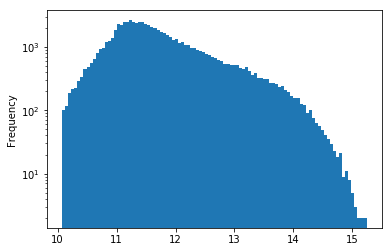

In [88]:
# DataFrame plot method
%matplotlib inline
import matplotlib.pyplot as plt
block['lmhalo'].plot.hist(bins=100, logy = True)
plt.show()

### SELECTING AND SLICING

- The idea of this section is to show how to slice and get and set subsets of pandas objects

- The basics of indexing are as follows:

| Operation                      | Syntax           | Result        |
|--------------------------------|------------------|---------------|
| Select column                  | df[column label] | Series        |
| Select row by index            | df.loc[index]    | Series        |
| Select row by integer location | df.iloc[pos]     | Series        |
| Slice rows                     | df[5:10]         | DataFrame     |
| Select rows by boolean vector  | df[bool_vec]     | DataFrame     |

In [89]:
# Same dataframe as before
filename='../resources/galaxy_sample.csv.bz2'
galaxy_sample = pd.read_csv(filename, sep=',', index_col = unique_gal_id_field, comment='#', na_values = r'\N')

In [90]:
galaxy_sample.head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
28066816,2.814453,31.387212,0.28162,0.28243,11.8192,-19.978033,0.6869,19.654366
31695360,11.170244,52.128139,0.52944,0.53018,12.1493,-20.899816,0.9445,20.573183
9050624,15.515433,73.343966,0.32986,0.32613,12.1488,-18.419456,0.3122,21.690542
2320896,44.974395,19.339001,0.11159,0.11212,11.8812,-15.157958,0.4212,22.382442


- Select a column

In [91]:
galaxy_sample['ra_gal'].head()

unique_gal_id
28581888     6.322946
28066816     2.814453
31695360    11.170244
9050624     15.515433
2320896     44.974395
Name: ra_gal, dtype: float64

In [92]:
type(galaxy_sample['dec_gal'])

pandas.core.series.Series

In [93]:
galaxy_sample[['ra_gal','dec_gal','lmhalo']].head()

,ra_gal,dec_gal,lmhalo
unique_gal_id,,,
28581888,6.322946,25.820680,13.5638
28066816,2.814453,31.387212,11.8192
31695360,11.170244,52.128139,12.1493
9050624,15.515433,73.343966,12.1488
2320896,44.974395,19.339001,11.8812


- Select a row by index

In [94]:
galaxy_sample.loc[28581888]

ra_gal       6.322946
dec_gal     25.820680
z_cgal       0.309170
z_cgal_v     0.308940
lmhalo      13.563800
abs_mag    -19.107267
color        0.868300
app_mag     20.773734
Name: 28581888, dtype: float64

In [95]:
type(galaxy_sample.loc[28581888])

pandas.core.series.Series

- Select a row by integer location

In [96]:
galaxy_sample.iloc[0]

ra_gal       6.322946
dec_gal     25.820680
z_cgal       0.309170
z_cgal_v     0.308940
lmhalo      13.563800
abs_mag    -19.107267
color        0.868300
app_mag     20.773734
Name: 28581888, dtype: float64

In [97]:
type(galaxy_sample.iloc[0])

pandas.core.series.Series

- Slice rows

In [98]:
galaxy_sample.iloc[3:7]

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
9050624,15.515433,73.343966,0.32986,0.32613,12.1488,-18.419456,0.3122,21.690542
2320896,44.974395,19.339001,0.11159,0.11212,11.8812,-15.157958,0.4212,22.382442
3231232,45.789139,52.770253,0.12072,0.11941,12.2684,-20.102991,0.9073,17.375809
6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.587480,0.8183,21.803620


In [99]:
galaxy_sample[3:7]

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
9050624,15.515433,73.343966,0.32986,0.32613,12.1488,-18.419456,0.3122,21.690542
2320896,44.974395,19.339001,0.11159,0.11212,11.8812,-15.157958,0.4212,22.382442
3231232,45.789139,52.770253,0.12072,0.11941,12.2684,-20.102991,0.9073,17.375809
6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.587480,0.8183,21.803620


In [100]:
type(galaxy_sample.iloc[3:7])

pandas.core.frame.DataFrame

- Select rows by boolean vector: 

The operators are: | for or, & for and, and ~ for not. These must be grouped by using parentheses.

In [101]:
# Boolean vector
(galaxy_sample['ra_gal'] < 45).tail()

unique_gal_id
87805440     True
84195840     True
67681792    False
72990720     True
63993856    False
Name: ra_gal, dtype: bool

In [102]:
type(galaxy_sample['ra_gal'] < 45)

pandas.core.series.Series

In [103]:
galaxy_sample[galaxy_sample['ra_gal'] < 45].head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
28581888,6.322946,25.820680,0.30917,0.30894,13.5638,-19.107267,0.8683,20.773734
28066816,2.814453,31.387212,0.28162,0.28243,11.8192,-19.978033,0.6869,19.654366
31695360,11.170244,52.128139,0.52944,0.53018,12.1493,-20.899816,0.9445,20.573183
9050624,15.515433,73.343966,0.32986,0.32613,12.1488,-18.419456,0.3122,21.690542
2320896,44.974395,19.339001,0.11159,0.11212,11.8812,-15.157958,0.4212,22.382442


In [104]:
# redshift shell
galaxy_sample[(galaxy_sample.z_cgal <= 0.2) | (galaxy_sample.z_cgal >= 1.0)].head()

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
2320896,44.974395,19.339001,0.11159,0.11212,11.8812,-15.157958,0.4212,22.382442
3231232,45.789139,52.770253,0.12072,0.11941,12.2684,-20.102991,0.9073,17.375809
6686720,32.696644,53.073577,0.17156,0.16844,14.4175,-16.587480,0.8183,21.803620
16560640,10.462836,44.857195,0.16759,0.16749,11.9834,-16.049906,0.3312,22.459095
6628352,45.339688,56.271580,0.16882,0.16605,12.9086,-15.260593,0.4677,23.187707


In [105]:
galaxy_sample[(galaxy_sample.z_cgal <= 1.0) & (galaxy_sample.index.isin([5670656,13615360,3231232]))]

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
3231232,45.789139,52.770253,0.12072,0.11941,12.2684,-20.102991,0.9073,17.375809


In [106]:
galaxy_sample[(galaxy_sample['ra_gal'] < 1.) & (galaxy_sample['dec_gal'] < 1.)][['ra_gal','dec_gal']].head()

,ra_gal,dec_gal
unique_gal_id,,
60252160,0.506340,0.603683
443736576,0.656398,0.543388
325529600,0.511039,0.443529
443926528,0.322707,0.102679
58356224,0.255694,0.978208


### Recap:
- loc works on labels in the index.
- iloc works on the positions in the index (so it only takes integers).

### Advanced example: estimate the size of the disk (*disk_length*) for a set of galaxies

- In this exercise we are going to use some of the previous examples. 
- Also we are going to introduce how to add a column and some other concepts

    - We split the galaxies into two different populations, Ellipticals and Spirals, depending on the their color and absolute magnitude:
        ```
         if color - 0.29 + 0.03 * abs_mag < 0 then Spiral
         else then Elliptical
        ```

    - How many galaxies are elliptical or spirals?

    - Elliptical galaxies do not have any disk (and therefore disk_length = 0).

    - The disk_length for spiral galaxies follows a normal distribution with mean = 0 and sigma = 0.15 (in arcsec). In addition, the minimum disk_length for a spiral galaxy is 1.e-3.

In [107]:
galaxy_sample.tail(10)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
51226112,1.812459,52.403705,1.07809,1.07976,11.7825,-20.554959,0.9294,23.319541
39375360,7.098744,56.255186,0.65746,0.65644,12.2429,-21.437735,0.6153,20.487363
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597
63503872,69.392947,43.658620,0.18615,0.18222,13.2758,-14.840212,0.4256,24.005288
64293888,81.038079,36.664168,0.21587,0.21705,13.2670,-15.962700,0.8145,22.967600
87805440,30.801181,50.422853,0.55537,0.55709,13.4698,-17.979239,0.7846,23.409461
84195840,37.404032,13.298397,0.32954,0.32949,13.4822,-15.640249,0.2666,24.475853
67681792,84.950583,62.382859,0.35486,0.35410,11.5632,-19.574097,0.5082,20.715805
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619


In [108]:
# Splitting the galaxies
# Boolean mask
has_disk_mask = (galaxy_sample['color']-0.29+0.03*galaxy_sample['abs_mag'] < 0)

In [109]:
has_disk_mask.tail(10)

unique_gal_id
51226112    False
39375360     True
53536768     True
63503872     True
64293888    False
87805440     True
84195840     True
67681792     True
72990720     True
63993856     True
dtype: bool

In [110]:
print (len(has_disk_mask))
print (type(has_disk_mask))

975842
<class 'pandas.core.series.Series'>


In [111]:
# Counting how many spirals
n_spiral = has_disk_mask.sum()

In [112]:
# Counting how many ellipticals
n_elliptical = ~has_disk_mask.sum()

In [113]:
galaxy_sample[has_disk_mask].count()

ra_gal      831887
dec_gal     831887
z_cgal      831887
z_cgal_v    831887
lmhalo      831887
abs_mag     831887
color       831887
app_mag     831887
dtype: int64

In [114]:
galaxy_sample[has_disk_mask]['hubble_type'] = 'Spiral'

/nfs/pic.es/user/j/jcarrete/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
# It did not add any column! It was working in a view!
galaxy_sample.tail(10)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag
unique_gal_id,,,,,,,,
51226112,1.812459,52.403705,1.07809,1.07976,11.7825,-20.554959,0.9294,23.319541
39375360,7.098744,56.255186,0.65746,0.65644,12.2429,-21.437735,0.6153,20.487363
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597
63503872,69.392947,43.658620,0.18615,0.18222,13.2758,-14.840212,0.4256,24.005288
64293888,81.038079,36.664168,0.21587,0.21705,13.2670,-15.962700,0.8145,22.967600
87805440,30.801181,50.422853,0.55537,0.55709,13.4698,-17.979239,0.7846,23.409461
84195840,37.404032,13.298397,0.32954,0.32949,13.4822,-15.640249,0.2666,24.475853
67681792,84.950583,62.382859,0.35486,0.35410,11.5632,-19.574097,0.5082,20.715805
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619


In [116]:
# This is the proper way of doing it if one wants to add another column
galaxy_sample.loc[has_disk_mask, 'hubble_type'] = 'Spiral'

In [117]:
galaxy_sample.loc[~has_disk_mask, 'hubble_type'] = 'Elliptical'

In [118]:
galaxy_sample.tail(10)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,hubble_type
unique_gal_id,,,,,,,,,
51226112,1.812459,52.403705,1.07809,1.07976,11.7825,-20.554959,0.9294,23.319541,Elliptical
39375360,7.098744,56.255186,0.65746,0.65644,12.2429,-21.437735,0.6153,20.487363,Spiral
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,Spiral
63503872,69.392947,43.658620,0.18615,0.18222,13.2758,-14.840212,0.4256,24.005288,Spiral
64293888,81.038079,36.664168,0.21587,0.21705,13.2670,-15.962700,0.8145,22.967600,Elliptical
87805440,30.801181,50.422853,0.55537,0.55709,13.4698,-17.979239,0.7846,23.409461,Spiral
84195840,37.404032,13.298397,0.32954,0.32949,13.4822,-15.640249,0.2666,24.475853,Spiral
67681792,84.950583,62.382859,0.35486,0.35410,11.5632,-19.574097,0.5082,20.715805,Spiral
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,Spiral


In [119]:
# We can use the numpy where method to do the same:
galaxy_sample['color_type'] = np.where(has_disk_mask, 'Blue', 'Red')

In [120]:
galaxy_sample.tail(10)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,hubble_type,color_type
unique_gal_id,,,,,,,,,,
51226112,1.812459,52.403705,1.07809,1.07976,11.7825,-20.554959,0.9294,23.319541,Elliptical,Red
39375360,7.098744,56.255186,0.65746,0.65644,12.2429,-21.437735,0.6153,20.487363,Spiral,Blue
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,Spiral,Blue
63503872,69.392947,43.658620,0.18615,0.18222,13.2758,-14.840212,0.4256,24.005288,Spiral,Blue
64293888,81.038079,36.664168,0.21587,0.21705,13.2670,-15.962700,0.8145,22.967600,Elliptical,Red
87805440,30.801181,50.422853,0.55537,0.55709,13.4698,-17.979239,0.7846,23.409461,Spiral,Blue
84195840,37.404032,13.298397,0.32954,0.32949,13.4822,-15.640249,0.2666,24.475853,Spiral,Blue
67681792,84.950583,62.382859,0.35486,0.35410,11.5632,-19.574097,0.5082,20.715805,Spiral,Blue
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,Spiral,Blue


In [121]:
# The proper way would be to use a boolean field
galaxy_sample['has_disk'] = has_disk_mask

In [122]:
galaxy_sample.tail(10)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,hubble_type,color_type,has_disk
unique_gal_id,,,,,,,,,,,
51226112,1.812459,52.403705,1.07809,1.07976,11.7825,-20.554959,0.9294,23.319541,Elliptical,Red,False
39375360,7.098744,56.255186,0.65746,0.65644,12.2429,-21.437735,0.6153,20.487363,Spiral,Blue,True
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,Spiral,Blue,True
63503872,69.392947,43.658620,0.18615,0.18222,13.2758,-14.840212,0.4256,24.005288,Spiral,Blue,True
64293888,81.038079,36.664168,0.21587,0.21705,13.2670,-15.962700,0.8145,22.967600,Elliptical,Red,False
87805440,30.801181,50.422853,0.55537,0.55709,13.4698,-17.979239,0.7846,23.409461,Spiral,Blue,True
84195840,37.404032,13.298397,0.32954,0.32949,13.4822,-15.640249,0.2666,24.475853,Spiral,Blue,True
67681792,84.950583,62.382859,0.35486,0.35410,11.5632,-19.574097,0.5082,20.715805,Spiral,Blue,True
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,Spiral,Blue,True


In [123]:
galaxy_sample.loc[~has_disk_mask, 'disk_length'] = 0.

In [124]:
galaxy_sample.loc[has_disk_mask, 'disk_length'] = np.fabs(
                np.random.normal(
                    0., scale=0.15, size=n_spiral
                )
            )

## DO NOT LOOP THE PANDAS DATAFRAME IN GENERAL!

In [125]:
galaxy_sample.tail(10)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,hubble_type,color_type,has_disk,disk_length
unique_gal_id,,,,,,,,,,,,
51226112,1.812459,52.403705,1.07809,1.07976,11.7825,-20.554959,0.9294,23.319541,Elliptical,Red,False,0.000000
39375360,7.098744,56.255186,0.65746,0.65644,12.2429,-21.437735,0.6153,20.487363,Spiral,Blue,True,0.211967
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,Spiral,Blue,True,0.062152
63503872,69.392947,43.658620,0.18615,0.18222,13.2758,-14.840212,0.4256,24.005288,Spiral,Blue,True,0.135624
64293888,81.038079,36.664168,0.21587,0.21705,13.2670,-15.962700,0.8145,22.967600,Elliptical,Red,False,0.000000
87805440,30.801181,50.422853,0.55537,0.55709,13.4698,-17.979239,0.7846,23.409461,Spiral,Blue,True,0.081238
84195840,37.404032,13.298397,0.32954,0.32949,13.4822,-15.640249,0.2666,24.475853,Spiral,Blue,True,0.033459
67681792,84.950583,62.382859,0.35486,0.35410,11.5632,-19.574097,0.5082,20.715805,Spiral,Blue,True,0.206403
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,Spiral,Blue,True,0.046335


In [126]:
# Minimum value for disk_length for spirals
dl_min = 1.e-4;

In [127]:
disk_too_small_mask = has_disk_mask & (galaxy_sample['disk_length'] < dl_min)

In [128]:
disk_too_small_mask.sum()

434

In [129]:
galaxy_sample.loc[disk_too_small_mask, 'disk_length'].head()

unique_gal_id
72092672     0.000077
275856384    0.000061
39430144     0.000043
306083840    0.000094
275776512    0.000078
Name: disk_length, dtype: float64

In [130]:
galaxy_sample.loc[disk_too_small_mask, 'disk_length'] = dl_min

In [131]:
galaxy_sample.loc[disk_too_small_mask, 'disk_length'].head()

unique_gal_id
72092672     0.0001
275856384    0.0001
39430144     0.0001
306083840    0.0001
275776512    0.0001
Name: disk_length, dtype: float64

In [132]:
galaxy_sample.tail(10)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,hubble_type,color_type,has_disk,disk_length
unique_gal_id,,,,,,,,,,,,
51226112,1.812459,52.403705,1.07809,1.07976,11.7825,-20.554959,0.9294,23.319541,Elliptical,Red,False,0.000000
39375360,7.098744,56.255186,0.65746,0.65644,12.2429,-21.437735,0.6153,20.487363,Spiral,Blue,True,0.211967
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,Spiral,Blue,True,0.062152
63503872,69.392947,43.658620,0.18615,0.18222,13.2758,-14.840212,0.4256,24.005288,Spiral,Blue,True,0.135624
64293888,81.038079,36.664168,0.21587,0.21705,13.2670,-15.962700,0.8145,22.967600,Elliptical,Red,False,0.000000
87805440,30.801181,50.422853,0.55537,0.55709,13.4698,-17.979239,0.7846,23.409461,Spiral,Blue,True,0.081238
84195840,37.404032,13.298397,0.32954,0.32949,13.4822,-15.640249,0.2666,24.475853,Spiral,Blue,True,0.033459
67681792,84.950583,62.382859,0.35486,0.35410,11.5632,-19.574097,0.5082,20.715805,Spiral,Blue,True,0.206403
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,Spiral,Blue,True,0.046335


### Exercise:

- What is the mean value and the standard deviation of the *disk_length* for spiral galaxies (Tip: use the .mean() and .std() methods)

- Estimate the bulge_length for elliptical galaxies. The bulge_length depends on the absolute magnitude in the following way:
    
    bulge_length = exp(-1.145 - 0.269 * (abs_mag - 23.))
    
- How many galaxies have bulge_lenth > 1.0?  

- In our model the maximum bulge_length for an elliptical galaxy is 0.5 arcsec.

- What is the mean value and the standard deviation of the *bulge_length* for elliptical galaxies. And for ellipticals with absolute magnitude brighter than -20?

In [133]:
mean_dl = galaxy_sample[has_disk_mask]['disk_length'].mean()
std_dl = galaxy_sample[has_disk_mask]['disk_length'].std()
print (mean_dl, std_dl)

0.11976267417608487 0.09036093837151513


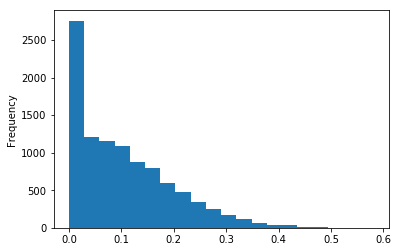

In [134]:
# FULL POPULATION
galaxy_sample['disk_length'].sample(n=10000).plot.hist(bins=20)#, logy = True)
plt.show()

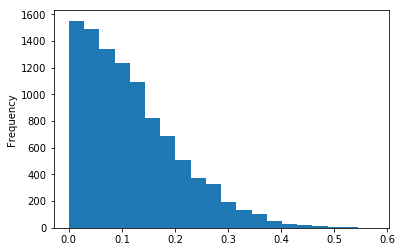

In [135]:
# SPIRAL GALAXIES
galaxy_sample[has_disk_mask]['disk_length'].sample(n=10000).plot.hist(bins=20)#, logy = True)
plt.show()

In [136]:
# bulge_length for Spiral galaxies = 0
galaxy_sample.loc[has_disk_mask,'bulge_length'] = 0

In [137]:
# bulge_length for elliptical galaxies
def bulge_length(mag):
    return np.exp(
        -1.145 - 0.269 * (mag - 23.)
    )

In [138]:
# bulge_length for Spiral galaxies = 0
galaxy_sample.loc[~has_disk_mask,'bulge_length'] = bulge_length(galaxy_sample['app_mag'])

In [139]:
galaxy_sample.tail(10)

,ra_gal,dec_gal,z_cgal,z_cgal_v,lmhalo,abs_mag,color,app_mag,hubble_type,color_type,has_disk,disk_length,bulge_length
unique_gal_id,,,,,,,,,,,,,
51226112,1.812459,52.403705,1.07809,1.07976,11.7825,-20.554959,0.9294,23.319541,Elliptical,Red,False,0.000000,0.292013
39375360,7.098744,56.255186,0.65746,0.65644,12.2429,-21.437735,0.6153,20.487363,Spiral,Blue,True,0.211967,0.000000
53536768,4.038207,22.901800,0.92618,0.92719,12.6905,-20.333803,0.4837,22.529597,Spiral,Blue,True,0.062152,0.000000
63503872,69.392947,43.658620,0.18615,0.18222,13.2758,-14.840212,0.4256,24.005288,Spiral,Blue,True,0.135624,0.000000
64293888,81.038079,36.664168,0.21587,0.21705,13.2670,-15.962700,0.8145,22.967600,Elliptical,Red,False,0.000000,0.321010
87805440,30.801181,50.422853,0.55537,0.55709,13.4698,-17.979239,0.7846,23.409461,Spiral,Blue,True,0.081238,0.000000
84195840,37.404032,13.298397,0.32954,0.32949,13.4822,-15.640249,0.2666,24.475853,Spiral,Blue,True,0.033459,0.000000
67681792,84.950583,62.382859,0.35486,0.35410,11.5632,-19.574097,0.5082,20.715805,Spiral,Blue,True,0.206403,0.000000
72990720,34.863831,2.792849,0.19577,0.19544,12.4254,-16.182981,0.7664,22.620619,Spiral,Blue,True,0.046335,0.000000


In [140]:
bl_max = 1.

In [141]:
bulge_too_large_mask = ~has_disk_mask & (galaxy_sample['bulge_length'] > bl_max)

In [142]:
bulge_too_large_mask.sum()

1616

In [143]:
galaxy_sample.loc[bulge_too_large_mask, 'bulge_length'].head()

unique_gal_id
3231232     1.444708
64666624    1.711662
63762432    1.219481
15986688    1.189110
74292736    1.100757
Name: bulge_length, dtype: float64

In [144]:
galaxy_sample.loc[bulge_too_large_mask, 'bulge_length'] = bl_max

In [145]:
galaxy_sample.loc[bulge_too_large_mask, 'bulge_length'].head()

unique_gal_id
3231232     1.0
64666624    1.0
63762432    1.0
15986688    1.0
74292736    1.0
Name: bulge_length, dtype: float64

In [146]:
mean_bl = galaxy_sample[~has_disk_mask]['bulge_length'].mean()
std_bl = galaxy_sample[~has_disk_mask]['bulge_length'].std()
print (mean_bl, std_bl)

0.3601375793346691 0.15193438789137492


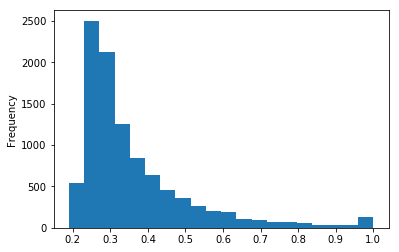

In [147]:
# SPIRAL GALAXIES
galaxy_sample[~has_disk_mask]['bulge_length'].sample(10000).plot.hist(bins=20)#, logy = True)
plt.show()

In [148]:
bulge_and_bright_mask = ~has_disk_mask & (galaxy_sample['abs_mag'] < -21.0)

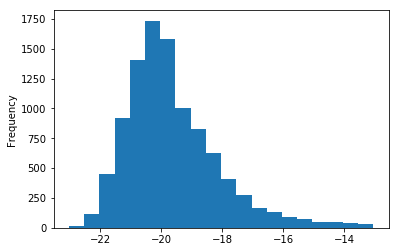

In [149]:
galaxy_sample[~has_disk_mask]['abs_mag'].sample(10000).plot.hist(bins=20)#, logy = True)
plt.show()

In [150]:
mean_bl = galaxy_sample[bulge_and_bright_mask]['bulge_length'].mean()
std_bl = galaxy_sample[bulge_and_bright_mask]['bulge_length'].std()
print (mean_bl, std_bl)

0.42784644091468577 0.18010576024653646


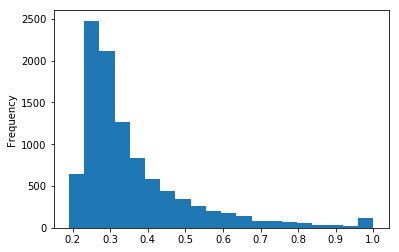

In [151]:
# SPIRAL GALAXIES
galaxy_sample[~has_disk_mask]['bulge_length'].sample(10000).plot.hist(bins=20)#, logy = True)
plt.show()

### Merge, join, and concatenate

<https://pandas.pydata.org/pandas-docs/stable/merging.html>

- pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

- *concat* method:
```
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

In [152]:
df1 = pd.DataFrame(
    {'A': ['A0', 'A1', 'A2', 'A3'],
     'B': ['B0', 'B1', 'B2', 'B3'],
     'C': ['C0', 'C1', 'C2', 'C3'],
     'D': ['D0', 'D1', 'D2', 'D3']},
    index=[0, 1, 2, 3]
)

In [153]:
df2 = pd.DataFrame(
    {'A': ['A4', 'A5', 'A6', 'A7'],
     'B': ['B4', 'B5', 'B6', 'B7'],
     'C': ['C4', 'C5', 'C6', 'C7'],
     'D': ['D4', 'D5', 'D6', 'D7']},
    index=[4, 5, 6, 7]
) 

In [154]:
df3 = pd.DataFrame(
    {'A': ['A8', 'A9', 'A10', 'A11'],
     'B': ['B8', 'B9', 'B10', 'B11'],
     'C': ['C8', 'C9', 'C10', 'C11'],
     'D': ['D8', 'D9', 'D10', 'D11']},
    index=[8, 9, 10, 11]
)

In [155]:
frames = [df1, df2, df3]

In [156]:
result = pd.concat(frames)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [157]:
# Multiindex
result = pd.concat(frames, keys=['x', 'y','z'])

In [158]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [159]:
result.index

MultiIndex(levels=[['x', 'y', 'z'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]])

In [160]:
result.loc['y']

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [161]:
df4 = pd.DataFrame(
    {'B': ['B2', 'B3', 'B6', 'B7'],
     'D': ['D2', 'D3', 'D6', 'D7'],
     'F': ['F2', 'F3', 'F6', 'F7']},
    index=[2, 3, 6, 7]
)

In [162]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [163]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [164]:
result = pd.concat([df1, df4])
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [165]:
result = pd.concat([df1, df4], axis=1)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [166]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


- Using *append* method:

In [167]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [168]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [169]:
result = df1.append(df2)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [170]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [171]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [172]:
result = df1.append(df4)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [173]:
result = pd.concat([df1,df4])
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
2,NaN,B2,NaN,D2,F2
3,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


- Note: Unlike list.append method, which appends to the original list and returns nothing, append here does not modify df1 and returns its copy with df2 appended.

In [174]:
result = pd.concat([df1,df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


- This is also a valid argument to DataFrame.append:

In [175]:
result = df1.append(df4, ignore_index = True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


- Mixing dimensions

In [176]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [177]:
s1 = pd.Series(['X0', 'X1', 'X2', 'X3'], name='X')
s1

0    X0
1    X1
2    X2
3    X3
Name: X, dtype: object

In [178]:
result = pd.concat([s1,df1])
result

,0,A,B,C,D
0,X0,NaN,NaN,NaN,NaN
1,X1,NaN,NaN,NaN,NaN
2,X2,NaN,NaN,NaN,NaN
3,X3,NaN,NaN,NaN,NaN
0,NaN,A0,B0,C0,D0
1,NaN,A1,B1,C1,D1
2,NaN,A2,B2,C2,D2
3,NaN,A3,B3,C3,D3


In [179]:
result = pd.concat([df1,s1], axis = 1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


In [180]:
s2 = pd.Series(['_0', '_1', '_2', '_3'])

In [181]:
result = pd.concat([df1,s2,s2,s2], axis = 1)
result

,A,B,C,D,0,1,2
0,A0,B0,C0,D0,_0,_0,_0
1,A1,B1,C1,D1,_1,_1,_1
2,A2,B2,C2,D2,_2,_2,_2
3,A3,B3,C3,D3,_3,_3,_3


### Example: Generate a random catalog using concat method

- In this exercise we will use the concat method and show a basic example of multiIndex.

- Given a subset of 3 galaxies with the following properties ['halo_id', 'gal_id' ,'ra', 'dec', 'z', 'abs_mag'], create a random catalog with 50 times more galaxies than the subset keeping the properties of the galaxies but placing them randomly in the first octant of the sky. 

- The index of each galaxy is given by the tuple [halo_id, gal_id]

In [182]:
data =  [
    # halo_id, gal_id, ra, dec, z, abs_mag'
    [1, 1, 21.5, 30.1, 0.21, -21.2],
    [1, 2, 21.6, 29.0, 0.21, -18.3],
    [1, 3, 21.4, 30.0, 0.21, -18.5],
    [2, 1, 45.0, 45.0, 0.42, -20.4],
    [3, 1, 25.0, 33.1, 0.61, -21.2],
    [3, 2, 25.1, 33.2, 0.61, -20.3]
]

nrandom = 50

In [183]:
galaxies = pd.DataFrame(data, columns=['halo_id', 'gal_id', 'ra', 'dec', 'z', 'abs_mag'])
galaxies = galaxies.set_index(['halo_id', 'gal_id'])
galaxies

ra   dec     z  abs_mag
halo_id gal_id                           
1       1       21.5  30.1  0.21    -21.2
        2       21.6  29.0  0.21    -18.3
        3       21.4  30.0  0.21    -18.5
2       1       45.0  45.0  0.42    -20.4
3       1       25.0  33.1  0.61    -21.2
        2       25.1  33.2  0.61    -20.3

In [184]:
# Easy example of selecting all galaxies from one halo
galaxies.loc[3]

,ra,dec,z,abs_mag
gal_id,,,,
1,25.0,33.1,0.61,-21.2
2,25.1,33.2,0.61,-20.3


In [185]:
galaxies.loc[1]

,ra,dec,z,abs_mag
gal_id,,,,
1,21.5,30.1,0.21,-21.2
2,21.6,29.0,0.21,-18.3
3,21.4,30.0,0.21,-18.5


In [186]:
galaxies.loc[1]['abs_mag'].mean()

-19.333333333333332

In [187]:
random_galaxies = pd.concat([galaxies]*nrandom)
random_galaxies.head(15)

ra   dec     z  abs_mag
halo_id gal_id                           
1       1       21.5  30.1  0.21    -21.2
        2       21.6  29.0  0.21    -18.3
        3       21.4  30.0  0.21    -18.5
2       1       45.0  45.0  0.42    -20.4
3       1       25.0  33.1  0.61    -21.2
        2       25.1  33.2  0.61    -20.3
1       1       21.5  30.1  0.21    -21.2
        2       21.6  29.0  0.21    -18.3
        3       21.4  30.0  0.21    -18.5
2       1       45.0  45.0  0.42    -20.4
3       1       25.0  33.1  0.61    -21.2
        2       25.1  33.2  0.61    -20.3
1       1       21.5  30.1  0.21    -21.2
        2       21.6  29.0  0.21    -18.3
        3       21.4  30.0  0.21    -18.5

In [188]:
random_galaxies = random_galaxies.reset_index()
random_galaxies.head(10)

,halo_id,gal_id,ra,dec,z,abs_mag
0,1,1,21.5,30.1,0.21,-21.2
1,1,2,21.6,29.0,0.21,-18.3
2,1,3,21.4,30.0,0.21,-18.5
3,2,1,45.0,45.0,0.42,-20.4
4,3,1,25.0,33.1,0.61,-21.2
5,3,2,25.1,33.2,0.61,-20.3
6,1,1,21.5,30.1,0.21,-21.2
7,1,2,21.6,29.0,0.21,-18.3
8,1,3,21.4,30.0,0.21,-18.5
9,2,1,45.0,45.0,0.42,-20.4


In [189]:
random_galaxies.index.names = ['random_index']
random_galaxies.head(10)

,halo_id,gal_id,ra,dec,z,abs_mag
random_index,,,,,,
0,1,1,21.5,30.1,0.21,-21.2
1,1,2,21.6,29.0,0.21,-18.3
2,1,3,21.4,30.0,0.21,-18.5
3,2,1,45.0,45.0,0.42,-20.4
4,3,1,25.0,33.1,0.61,-21.2
5,3,2,25.1,33.2,0.61,-20.3
6,1,1,21.5,30.1,0.21,-21.2
7,1,2,21.6,29.0,0.21,-18.3
8,1,3,21.4,30.0,0.21,-18.5


In [190]:
import math
random_galaxies['ra'] = 90.*np.random.random(len(random_galaxies))
random_galaxies['dec'] = (180./math.pi)*np.arccos(np.random.random(len(random_galaxies))-1)-90

In [191]:
random_galaxies.head(10)

,halo_id,gal_id,ra,dec,z,abs_mag
random_index,,,,,,
0,1,1,5.059117,25.273737,0.21,-21.2
1,1,2,15.402714,16.676486,0.21,-18.3
2,1,3,31.492719,81.509722,0.21,-18.5
3,2,1,26.887678,52.818770,0.42,-20.4
4,3,1,83.698903,38.602935,0.61,-21.2
5,3,2,17.681537,29.084338,0.61,-20.3
6,1,1,25.014731,51.374859,0.21,-21.2
7,1,2,11.548162,20.729800,0.21,-18.3
8,1,3,16.443850,30.311083,0.21,-18.5


#### Merge method: Database-style DataFrame joining/merging:

- pandas has full-featured, high performance in-memory join operations idiomatically very similar to relational databases like SQL. These methods perform significantly better (in some cases well over an order of magnitude better) than other open source implementations (like base::merge.data.frame in R). The reason for this is careful algorithmic design and internal layout of the data in DataFrame

- See the [cookbook](https://pandas.pydata.org/pandas-docs/stable/cookbook.html) for some advanced strategies

- Users who are familiar with SQL but new to pandas might be interested in a [comparison with SQL](https://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html#compare-with-sql-join)

```
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False)
```

#### Example: PAU example

- Goal: build a dataframe merging 2 different dataframes with complementary information, through the relation given by a third dataframe.

    - df_stars contains information of stars magnitudes per sdss_star_id and per *filter*:
        - ['sdss_star_id', 'filter', 'expected_mag', 'expected_mag_err']
        - Note, the file is "somehow" corrupted and entries are duplicate several times
        - Unique entries are characterized by *sdss_star_id* and *filter*
    - df_spectra contains information of star *flux* per *band* (== *filter*) and per *spec_id* (!= *sdss_star_id*):
        - ['spec_id', 'band', 'flux', 'flux_err']
        - Unique entries are characterized by *spec_id* and *band*
    - df_spec_IDs allows to make the correspondence between *sdss_star_id* (== *objID*) and *spec_id* (== *specObjID*):
        - ['objID', 'specObjID']
        - Unique entries are characterized by *objID*

In [192]:
star_filename = '../resources/df_star.ssv'
spectra_filename = '../resources/df_spectra.ssv'
starid_specid_filename = '../resources/df_starid_specid.ssv'

In [193]:
# Given that the file is somehow corrupted we open it without defining any index
df_star = pd.read_csv(star_filename, sep=' ')

In [194]:
df_star.head()

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498
1,1237651754534174862,NB455,16.0077,0.009613
2,1237651754534174868,NB455,16.4402,0.018096
3,1237653665258995739,NB455,18.0902,0.026920
4,1237653665258995741,NB455,18.1403,0.033415


In [195]:
# We know there are duplicates, e.g:
df_star[(df_star['sdss_star_id'] == 1237653665258930303) & (df_star['filter'] == 'NB455')]

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498
14135,1237653665258930303,NB455,14.1185,0.002498
41578,1237653665258930303,NB455,14.1185,0.002498
69366,1237653665258930303,NB455,14.1185,0.002498
76098,1237653665258930303,NB455,14.1185,0.002498
92857,1237653665258930303,NB455,14.1185,0.002498
94740,1237653665258930303,NB455,14.1185,0.002498
102129,1237653665258930303,NB455,14.1185,0.002498


In [196]:
# Drop duplicates:
df_star.drop_duplicates(subset = ['sdss_star_id', 'filter'], inplace= True)

In [197]:
df_star[(df_star['sdss_star_id'] == 1237653665258930303) & (df_star['filter'] == 'NB455')]

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498


In [198]:
df_spectra = pd.read_csv(spectra_filename, index_col=['spec_id', 'band'], sep = ' ')

/nfs/pic.es/user/j/jcarrete/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [199]:
df_starid_specid = pd.read_csv(starid_specid_filename, sep=' ')

#### NOTE: When sep = ' ' means ONE space, not "several" spaces!

- See bad example in 'Caveats and technicalities' section below

In [200]:
df_star.head(10)

,sdss_star_id,filter,expected_mag,expected_mag_err
0,1237653665258930303,NB455,14.1185,0.002498
1,1237651754534174862,NB455,16.0077,0.009613
2,1237651754534174868,NB455,16.4402,0.018096
3,1237653665258995739,NB455,18.0902,0.026920
4,1237653665258995741,NB455,18.1403,0.033415
5,1237653665258995735,NB455,16.5273,0.019411
6,1237651754534174879,NB455,16.2990,0.021418
7,1237651754534175046,NB455,18.5312,0.018517
8,1237653665258995740,NB455,18.1420,0.013531
9,1237653665258995737,NB455,18.7606,0.018422


In [201]:
df_spectra.head(41)

flux  flux_err
spec_id            band                    
564125093970601984 NB575  118.439   5.82869
                   NB455  139.590   4.68904
                   NB555  131.690   5.15743
                   NB475  117.701   4.35988
                   NB795  153.804  10.49200
                   NB535  115.215   4.52892
                   NB725  166.609   6.41391
                   NB765  148.803   8.70154
                   NB815  159.590   9.24626
                   NB485  112.973   4.42662
                   NB685  193.392   5.02416
                   NB705  154.606   5.02007
                   NB835  193.390  13.89030
                   NB645  133.584   4.41329
                   NB585  123.810   6.51806
                   NB505  124.124   4.26728
                   NB695  159.519   5.38121
                   NB625  142.537   5.04128
                   NB745  140.507   6.48958
                   NB605  130.867   5.19826
                   NB565  130.628   5.44442
                   NB465  146.835   4.58899
                   NB545  111.936   4.69258
                   NB525  110.591   4.36454
                   NB665  151.969   4.31910
                   NB785  166.931  10.25410
                   NB805  153.564   9.49142
                   NB615  137.293   4.74815
                   NB635  133.074   4.73063
                   NB715  166.483   5.05375
                   NB825  160.063  10.96990
                   NB495  112.334   4.30512
                   NB595  122.645   5.97710
                   NB675  200.884   4.21519
                   NB845  191.830  14.44110
                   NB655  140.002   4.60485
                   NB515  110.836   4.26808
                   NB755  140.380   7.14257
                   NB735  156.592   7.43371
                   NB775  164.835   8.71259
564125643726415872 NB575  376.499   6.55297

In [202]:
df_starid_specid.head(5)

,objID,specObjID
0,1237653664722386988,564125918604322816
1,1237648722828460042,564133065429903360
2,1237651752923758623,564134714697345024
3,1237651752923758661,564134989575251968
4,1237653664722190405,564137188598507520


In [203]:
# We are going to unset the index and rename the columsn in order to use the "on" argument:

In [204]:
df_spectra.reset_index(inplace = True)
df_spectra.head()

,spec_id,band,flux,flux_err
0,564125093970601984,NB575,118.439,5.82869
1,564125093970601984,NB455,139.590,4.68904
2,564125093970601984,NB555,131.690,5.15743
3,564125093970601984,NB475,117.701,4.35988
4,564125093970601984,NB795,153.804,10.49200


In [205]:
df_spectra.rename(columns={'band': 'filter'}, inplace = True)
df_spectra.head()

,spec_id,filter,flux,flux_err
0,564125093970601984,NB575,118.439,5.82869
1,564125093970601984,NB455,139.590,4.68904
2,564125093970601984,NB555,131.690,5.15743
3,564125093970601984,NB475,117.701,4.35988
4,564125093970601984,NB795,153.804,10.49200


In [206]:
df_starid_specid.rename(columns={'objID':'sdss_star_id', 'specObjID':'spec_id'}, inplace = True)
df_starid_specid.head()

,sdss_star_id,spec_id
0,1237653664722386988,564125918604322816
1,1237648722828460042,564133065429903360
2,1237651752923758623,564134714697345024
3,1237651752923758661,564134989575251968
4,1237653664722190405,564137188598507520


In [207]:
# Now we have everything ready to make the JOINs

In [208]:
df_star_merged = pd.merge(df_star, df_starid_specid, on='sdss_star_id')

In [209]:
df_star_merged.head()

,sdss_star_id,filter,expected_mag,expected_mag_err,spec_id
0,1237653665259061426,NB455,17.0845,0.008731,563122610200668160
1,1237653665259061426,NB475,16.9845,0.008731,563122610200668160
2,1237653665259061426,NB535,16.7995,0.008731,563122610200668160
3,1237653665259061426,NB685,16.5315,0.008731,563122610200668160
4,1237653665259061426,NB655,16.5745,0.008731,563122610200668160


In [210]:
df_star_merged = pd.merge(df_star_merged, df_spectra, on=['spec_id','filter'])

In [211]:
df_star_merged.head(40)

,sdss_star_id,filter,expected_mag,expected_mag_err,spec_id,flux,flux_err
0,1237653665259061426,NB455,17.0845,0.008731,563122610200668160,3449.55,14.09800
1,1237653665259061426,NB475,16.9845,0.008731,563122610200668160,3787.50,14.22110
2,1237653665259061426,NB535,16.7995,0.008731,563122610200668160,4294.29,15.15040
3,1237653665259061426,NB685,16.5315,0.008731,563122610200668160,5159.24,16.80340
4,1237653665259061426,NB655,16.5745,0.008731,563122610200668160,4901.12,15.64510
5,1237653665259061426,NB765,16.4835,0.008731,563122610200668160,5256.04,22.53470
6,1237653665259061426,NB845,16.4475,0.008731,563122610200668160,5224.63,27.16950
7,1237653665259061426,NB545,16.7635,0.008731,563122610200668160,4381.42,15.48150
8,1237653665259061426,NB745,16.4945,0.008731,563122610200668160,5204.17,18.33640
9,1237653665259061426,NB565,16.7105,0.008731,563122610200668160,4548.09,16.60220


In [212]:
df_star_merged.set_index(['sdss_star_id', 'filter'], inplace = True)

In [213]:
df_star_merged.head()

expected_mag  expected_mag_err  \
sdss_star_id        filter                                   
1237653665259061426 NB455        17.0845          0.008731   
                    NB475        16.9845          0.008731   
                    NB535        16.7995          0.008731   
                    NB685        16.5315          0.008731   
                    NB655        16.5745          0.008731   

                                       spec_id     flux  flux_err  
sdss_star_id        filter                                         
1237653665259061426 NB455   563122610200668160  3449.55   14.0980  
                    NB475   563122610200668160  3787.50   14.2211  
                    NB535   563122610200668160  4294.29   15.1504  
                    NB685   563122610200668160  5159.24   16.8034  
                    NB655   563122610200668160  4901.12   15.6451

In [214]:
# Each element has been observed in how many bands?
count_bands = df_star_merged.groupby(level=0)['flux'].count()

In [215]:
count_bands.head(20)

sdss_star_id
1237648722827870212     5
1237648722827870237     5
1237648722827870367     5
1237648722827870374     3
1237648722827935750     5
1237648722827935861     5
1237648722827935902     5
1237648722827935914     4
1237648722827935919     5
1237648722827935932     4
1237648722828001327    10
1237648722828001339    10
1237648722828001342    10
1237648722828001410     6
1237648722828001419    10
1237648722828066862    10
1237648722828066938    10
1237648722828066958    10
1237648722828132369    10
1237648722828132408    10
Name: flux, dtype: int64

In [216]:
df_star_merged.groupby(level=1)['flux_err'].mean().head(10)

filter
NB455    7.725166
NB465    7.935421
NB475    7.720782
NB485    7.795951
NB495    7.964259
NB505    8.040383
NB515    8.438551
NB525    8.940733
NB535    8.088588
NB545    8.619306
Name: flux_err, dtype: float64

### More functions
- Looping a dataframe (iterrows):

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html>

- sort method:

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html>

- sample method:

<https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html>

- Reshape dataframes (pivot, stack, unstack):

<http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/>

- Data cleaning:
    
    - check for missing values (isnull): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html>
    - drop missing values (dropna): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html>
    - fill the missing values with other values (fillna): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html>
    - replace values with different values (replace): <https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html>

## Some general ideas to get home:

- Do not loop a dataframe!

- Try to work by chunks; create functions that work with chunks

- Work with standard formats and "already implemented" functions

### Caveats and technicalities

### [Floating point limitations](<https://docs.python.org/2/tutorial/floatingpoint.html>):

- Be careful with exact comparisons!

In [217]:
# e.g.: the decimal value 0.1 cannot be represented exactly as a base 2 fraction
(0.1 + 0.2) == 0.3

False

In [218]:
(0.1 + 0.2) - 0.3

5.551115123125783e-17

### FITS files

- [fitsio](<https://pypi.python.org/pypi/fitsio/>)

- And working by chunks

In [219]:
import fitsio

In [220]:
filename = '../resources/galaxy_sample.fits'

In [221]:
fits=fitsio.FITS(filename)

In [222]:
data = fits[1]

In [223]:
# Number of rows
data.get_nrows()

975842

In [224]:
# chunk size
gal_chunk = 300000

In [225]:
# e.g.to create the ranges!
niter = int(math.ceil(data.get_nrows() / float(gal_chunk)))

for i in range(niter):
    s = i*gal_chunk
    f = min((i+1)*gal_chunk, data.get_nrows())
    chunk = data[s:f]
    print (i)
    print (type(chunk))
    print (chunk.dtype)
    df_chunk = pd.DataFrame(chunk)
    print (type(df_chunk))
    print (df_chunk.dtypes)
    df_chunk = df_chunk.set_index('unique_gal_id')
    print (df_chunk.head())

0
<class 'numpy.ndarray'>
[('unique_gal_id', '>i8'), ('ra_gal', '>f8'), ('dec_gal', '>f8'), ('z_cgal', '>f8'), ('z_cgal_v', '>f8'), ('lmhalo', '>f4'), ('abs_mag', '>f8'), ('color', '>f4'), ('app_mag', '>f8')]
<class 'pandas.core.frame.DataFrame'>
unique_gal_id        >i8
ra_gal           float64
dec_gal          float64
z_cgal           float64
z_cgal_v         float64
lmhalo           float32
abs_mag          float64
color            float32
app_mag          float64
dtype: object
                  ra_gal    dec_gal   z_cgal  z_cgal_v   lmhalo    abs_mag  \
unique_gal_id                                                                
28581888        6.322946  25.820680  0.30917   0.30894  13.5638 -19.107267   
28066816        2.814453  31.387212  0.28162   0.28243  11.8192 -19.978033   
31695360       11.170244  52.128139  0.52944   0.53018  12.1493 -20.899816   
9050624        15.515433  73.343966  0.32986   0.32613  12.1488 -18.419456   
2320896        44.974395  19.339001  0.11159  

#### [.values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.values.html) DataFrame attribute 

- Some scipy functions do not allow to use pandas dataframe as arguments and therefore it is useful to use the values atribute, which is the numpy representation of NDFrame

- The dtype will be a lower-common-denominator dtype (implicit upcasting); that is to say if the dtypes (even of numeric types) are mixed, the one that accommodates all will be chosen. Use this with care if you are not dealing with the blocks.

#### View vs. Copy

<https://pandas.pydata.org/pandas-docs/stable/indexing.html#returning-a-view-versus-a-copy>

#### Wrong input example:
- .dat

- Look at the file using e.g. *head* bash command

- Note that there are more than one space, and if you do *tail filename*, different number of "spaces"

In [226]:
bad_filename = '../resources/steps.flagship.dat'

In [227]:
df_bad = pd.read_csv(bad_filename)
df_bad.head()

,400 0.000000000000E+00 3.788230419159E+00 1.894401788712E+00 9.993683695793E-01 6.319999811240E-04
0,399 3.788230419159E+00 1.137576389313E+01 ...
1,398 1.137576389313E+01 1.898096656799E+01 ...
2,397 1.898096656799E+01 2.660372543335E+01 ...
3,396 2.660372543335E+01 3.424393081665E+01 ...
4,395 3.424393081665E+01 4.190146636963E+01 ...


In [228]:
df_bad =  pd.read_csv(bad_filename, sep = ' ')

ParserError: Error tokenizing data. C error: Expected 12 fields in line 302, saw 13


- Necessary to "modify" the file in order to convert it into a standard csv file, e.g.:

```
cat steps.flagship.dat | tr -s " " | sed 's/^ *//g' > steps.flagship.ssv
```

In [ ]:
filename = '../resources/steps.flagship.ssv'

In [ ]:
columns = ['step_num', 'r_min', 'r_max', 'r_med', 'a_med', 'z_med']

In [ ]:
df = pd.read_csv(filename, sep = ' ', header = None, names = columns, index_col = 'step_num')

In [ ]:
df.head()